In [449]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [450]:
### Loading the Dataset
data = pd.read_csv("House_Rent_Dataset.csv")

## Data Profiling

In [451]:
data.info() # read all the possible features in the CSV

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [452]:
data.isnull().sum() # check for nullity

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [453]:
data.head # quick overview of the csv

<bound method NDFrame.head of        Posted On  BHK   Rent  Size            Floor    Area Type  \
0     2022-05-18    2  10000  1100  Ground out of 2   Super Area   
1     2022-05-13    2  20000   800       1 out of 3   Super Area   
2     2022-05-16    2  17000  1000       1 out of 3   Super Area   
3     2022-07-04    2  10000   800       1 out of 2   Super Area   
4     2022-05-09    2   7500   850       1 out of 2  Carpet Area   
...          ...  ...    ...   ...              ...          ...   
4741  2022-05-18    2  15000  1000       3 out of 5  Carpet Area   
4742  2022-05-15    3  29000  2000       1 out of 4   Super Area   
4743  2022-07-10    3  35000  1750       3 out of 5  Carpet Area   
4744  2022-07-06    3  45000  1500     23 out of 34  Carpet Area   
4745  2022-05-04    2  15000  1000       4 out of 5  Carpet Area   

                 Area Locality       City Furnishing Status  Tenant Preferred  \
0                       Bandel    Kolkata       Unfurnished  Bachelors/F

## Data Cleaning

In [454]:
data['Floor'].unique()

array(['Ground out of 2', '1 out of 3', '1 out of 2', 'Ground out of 1',
       'Ground out of 4', '1 out of 4', '1 out of 1', 'Ground out of 3',
       '2 out of 3', '4 out of 5', '2 out of 2', '2 out of 5',
       '4 out of 14', '3 out of 3', '5 out of 5', '4 out of 4',
       '7 out of 8', '2 out of 4', '3 out of 4', '1 out of 5',
       '8 out of 5', 'Ground out of 6', '2 out of 1',
       'Upper Basement out of 4', 'Ground out of 5', '3 out of 5',
       '11 out of 19', '5 out of 10', '11 out of 14',
       'Lower Basement out of 2', '2 out of 7', '4 out of 10',
       '7 out of 10', '2 out of 13', '6 out of 7', '4 out of 7',
       '14 out of 14', '43 out of 78', '2 out of 8', '13 out of 18',
       '5 out of 12', '18 out of 24', '3 out of 7', '17 out of 31',
       '11 out of 21', '7 out of 19', '14 out of 23', '9 out of 20',
       'Upper Basement out of 9', '19 out of 24', '3 out of 21',
       '1 out of 22', '8 out of 8', '6 out of 12', '4 out of 58',
       'Upper Basement o

In [455]:
# Clean floor errors like "3 out of 2"(for consistency)
data['Floor'].value_counts()

Floor
1 out of 2         379
Ground out of 2    350
2 out of 3         312
2 out of 4         308
1 out of 3         293
                  ... 
11 out of 31         1
50 out of 75         1
18 out of 26         1
12 out of 27         1
23 out of 34         1
Name: count, Length: 480, dtype: int64

In [456]:
data.head

<bound method NDFrame.head of        Posted On  BHK   Rent  Size            Floor    Area Type  \
0     2022-05-18    2  10000  1100  Ground out of 2   Super Area   
1     2022-05-13    2  20000   800       1 out of 3   Super Area   
2     2022-05-16    2  17000  1000       1 out of 3   Super Area   
3     2022-07-04    2  10000   800       1 out of 2   Super Area   
4     2022-05-09    2   7500   850       1 out of 2  Carpet Area   
...          ...  ...    ...   ...              ...          ...   
4741  2022-05-18    2  15000  1000       3 out of 5  Carpet Area   
4742  2022-05-15    3  29000  2000       1 out of 4   Super Area   
4743  2022-07-10    3  35000  1750       3 out of 5  Carpet Area   
4744  2022-07-06    3  45000  1500     23 out of 34  Carpet Area   
4745  2022-05-04    2  15000  1000       4 out of 5  Carpet Area   

                 Area Locality       City Furnishing Status  Tenant Preferred  \
0                       Bandel    Kolkata       Unfurnished  Bachelors/F

In [457]:
def validate_floor_format(data, column):
    def validate_floor(parts):
        try:
            if int(parts[0]) > int(parts[3]):  # checking for X out of Y
                return None  # Invalid format, return None
            else:
                return ' '.join(parts)  # Valid format, return the joined string
        except (ValueError, IndexError): # assuming that the floor structure is as follows: LB -> UB -> Ground -> First Floor -> and so on
            if parts[0] in ['Ground', 'Upper', 'Lower']:
                if parts[0] == 'Ground':
                    if len(parts) == 1:
                        parts[0] = '1'
                        return ' '.join(parts)
                    else:
                        parts[0] = '1'
                        parts[-1] = str(int(parts[-1]) + 1)
                        return ' '.join(parts)
                if parts[0] == 'Upper':
                    parts[0] = '1'
                    parts.remove('Basement')
                    parts[-1] = str(int(parts[-1]) + 2)
                    return ' '.join(parts)
                if parts[0] == 'Lower':
                    parts[0] = '1'
                    parts.remove('Basement')
                    parts[-1] = str(int(parts[-1]) + 3)
                    return ' '.join(parts)
            return None  # Invalid format, return None

    # Apply the validation function to each row
    data[column] = data[column].str.split().apply(validate_floor)
    # Drop rows with invalid format
    data = data.dropna(subset=[column])
    return data

data = validate_floor_format(data, 'Floor')


In [458]:
cleaned_floor_data = data
cleaned_floor_data # all floor values are now cleaned and quantified

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,1 out of 3,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


## Data Analysis

<BarContainer object of 6 artists>

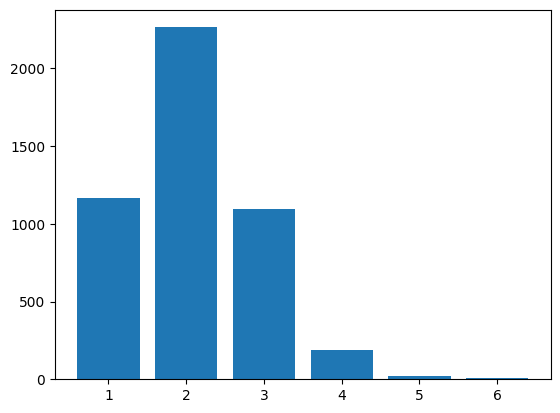

In [459]:
plt.bar(cleaned_floor_data['BHK'].value_counts().index, data['BHK'].value_counts().values) # BHK can be used as a feature

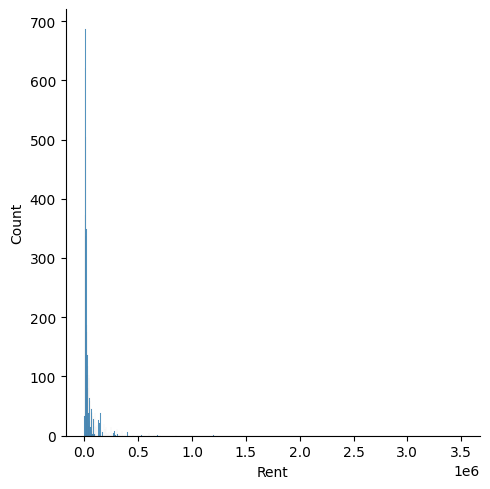

In [460]:
sns.displot(cleaned_floor_data['Rent']) # too many outliers can affect the final output of the model. It will skew the value upwards.

In [461]:
cleaned_floor_data['Rent'].describe() # Lots of abnormal outliers

count    4.741000e+03
mean     3.501644e+04
std      7.814423e+04
min      1.200000e+03
25%      1.000000e+04
50%      1.600000e+04
75%      3.300000e+04
max      3.500000e+06
Name: Rent, dtype: float64

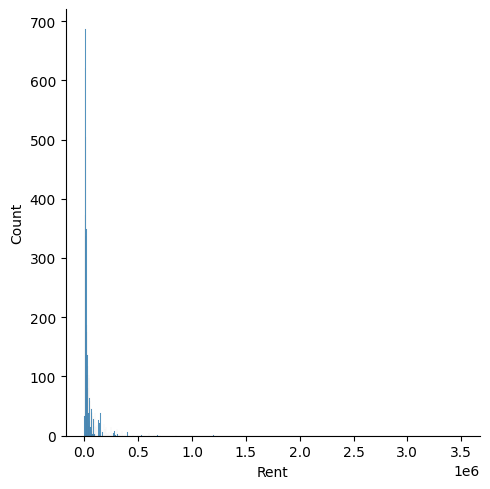

In [462]:
sns.displot(cleaned_floor_data['Rent'])

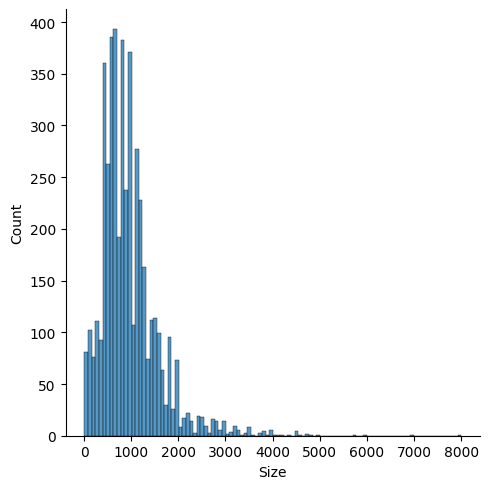

In [463]:
sns.displot(cleaned_floor_data['Size']) # Reasonable sizes. No need to adjust

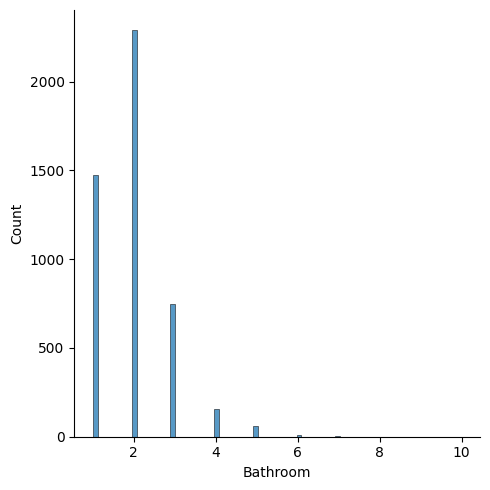

In [464]:
sns.displot(cleaned_floor_data['Bathroom']) # Reasonable sizes. No need to adjust

In [465]:
cleaned_floor_data['Floor'].value_counts()

Floor
1 out of 3      643
1 out of 2      574
1 out of 4      414
2 out of 3      312
2 out of 4      308
               ... 
12 out of 42      1
35 out of 68      1
18 out of 30      1
11 out of 31      1
23 out of 34      1
Name: count, Length: 449, dtype: int64

In [466]:
cleaned_floor_data['Area Type'].value_counts()

Area Type
Super Area     2444
Carpet Area    2295
Built Area        2
Name: count, dtype: int64

In [467]:
cleaned_floor_data['Area Locality'].value_counts()

Area Locality
Bandra West                                37
Gachibowli                                 29
Electronic City                            24
Velachery                                  22
Miyapur, NH 9                              22
                                           ..
Jayanti Nagar, Hormavu                      1
Kengeri Upanagara                           1
Ittamadu, Banashankari, Outer Ring Road     1
Rmv Extension, Armane Nagar                 1
Manikonda, Hyderabad                        1
Name: count, Length: 2233, dtype: int64

In [468]:
cleaned_floor_data['Furnishing Status'].value_counts()

Furnishing Status
Semi-Furnished    2249
Unfurnished       1813
Furnished          679
Name: count, dtype: int64

In [469]:
cleaned_floor_data['Tenant Preferred'].value_counts()

Tenant Preferred
Bachelors/Family    3440
Bachelors            830
Family               471
Name: count, dtype: int64

In [470]:
cleaned_floor_data['Point of Contact'].value_counts()

Point of Contact
Contact Owner      3211
Contact Agent      1529
Contact Builder       1
Name: count, dtype: int64

## Data Preprocessing

In [471]:
# Get rid of Rent Outliers by dropping the extreme lows and extreme highs
# Define the lower and upper percentile thresholds
lower_percentile = 0.25  # To represent the lower end of house prices
upper_percentile = 0.75  # To represent the higher end of house prices

# Calculate the quantiles
lower_threshold = cleaned_floor_data['Rent'].quantile(lower_percentile)
upper_threshold = cleaned_floor_data['Rent'].quantile(upper_percentile)

# Filter out the rows with rent values outside the thresholds
no_rent_outliers = cleaned_floor_data[(cleaned_floor_data['Rent'] >= lower_threshold) & (cleaned_floor_data['Rent'] <= upper_threshold)]
no_rent_outliers

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,1 out of 3,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
6,2022-06-21,2,10000,700,1 out of 5,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,2,Contact Agent
...,...,...,...,...,...,...,...,...,...,...,...,...
4739,2022-07-06,2,25000,1040,2 out of 4,Carpet Area,Gachibowli,Hyderabad,Unfurnished,Bachelors,2,Contact Owner
4740,2022-06-02,2,12000,1350,2 out of 2,Super Area,Old Alwal,Hyderabad,Unfurnished,Bachelors/Family,2,Contact Owner
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner


In [472]:
no_rent_outliers['Rent'].describe() # more reasonable prices

count     2487.000000
mean     17445.047849
std       6153.493273
min      10000.000000
25%      12000.000000
50%      15000.000000
75%      21233.500000
max      33000.000000
Name: Rent, dtype: float64

In [ ]:
## Quanitify Floor, Area Locality and Furnishing Status

In [473]:
final_data = no_rent_outliers.drop(columns=['Posted On'])
#final_data = separated_floors
final_data # this will now be the final dataset for the model

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,10000,1100,1 out of 3,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
6,2,10000,700,1 out of 5,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,2,Contact Agent
...,...,...,...,...,...,...,...,...,...,...,...
4739,2,25000,1040,2 out of 4,Carpet Area,Gachibowli,Hyderabad,Unfurnished,Bachelors,2,Contact Owner
4740,2,12000,1350,2 out of 2,Super Area,Old Alwal,Hyderabad,Unfurnished,Bachelors/Family,2,Contact Owner
4741,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner


In [474]:
def one_hot_encode(data, column, suffix=''):
    encoded = pd.get_dummies(data[column], drop_first=True, prefix=column+suffix)
    data = data.drop(column, axis = 1)
    data = data.join(encoded)
    return data

In [475]:

final_data = one_hot_encode(final_data, 'Area Type')
final_data = one_hot_encode(final_data, 'Area Locality', '')
final_data = one_hot_encode(final_data, 'City')
final_data = one_hot_encode(final_data, 'Furnishing Status')
final_data = one_hot_encode(final_data, 'Tenant Preferred')
final_data = one_hot_encode(final_data, 'Point of Contact')
final_data = one_hot_encode(final_data, 'Floor')
final_data


,BHK,Rent,Size,Bathroom,Area Type_Carpet Area,Area Type_Super Area,"Area Locality_ in Miyapur, NH 9",Area Locality_355 konnur highroad Ayanavaram,Area Locality_5-20 Adharshnagar,Area Locality_A 307 Blossom Heights,...,Floor_9 out of 10,Floor_9 out of 11,Floor_9 out of 12,Floor_9 out of 13,Floor_9 out of 14,Floor_9 out of 15,Floor_9 out of 18,Floor_9 out of 19,Floor_9 out of 20,Floor_9 out of 22
0,2,10000,1100,2,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,20000,800,1,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2,17000,1000,1,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2,10000,800,1,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,2,10000,700,2,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4739,2,25000,1040,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4740,2,12000,1350,2,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4741,2,15000,1000,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4742,3,29000,2000,3,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Model Training
## Training and Test Split

In [476]:
X = final_data.drop('Rent', axis= 1)
y = final_data['Rent']

In [477]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 42)

## Standardize the Values

In [478]:
from sklearn.preprocessing import StandardScaler    
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Regularization: Get the Optimal Alpha Value

In [479]:
from sklearn.linear_model import LassoCV
alphas = np.logspace(-3, 3, 11)
lasso_cv = LassoCV(alphas=alphas).fit(X_train, y_train)
best_alpha = lasso_cv.alpha_
print(best_alpha)

# from sklearn import linear_model
# model = linear_model.LinearRegression()
# model.fit(X_train, y_train)
# model.coef_

c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14759848.306146622, tolerance: 6076344.502752735
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 478560819.7982359, tolerance: 6076344.502752735
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 978453370.9132662, tolerance: 6076344.502752735
  model = cd_fast.ene

63.0957344480193


## Evaluation

### Quantitative Evaluation

In [480]:
y_preds = lasso_cv.predict(X_test)
# y_preds = model.predict(X_test)

In [481]:
from sklearn.metrics import mean_squared_error, r2_score

# The coefficients
# print("Coefficients: \n", model.coef_)
print("Coefficients: \n", lasso_cv.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_preds))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_preds))

Coefficients: 
 [1094.71267593 1942.68528775  857.98119165 ...  141.53472399   -0.
  131.54718176]
Mean squared error: 22123411.22
Coefficient of determination: 0.40


### Qualitative Evaluation

In [482]:
sample_data = X.iloc[0]
sample_data

BHK                          2
Size                      1100
Bathroom                     2
Area Type_Carpet Area    False
Area Type_Super Area      True
                         ...  
Floor_9 out of 15        False
Floor_9 out of 18        False
Floor_9 out of 19        False
Floor_9 out of 20        False
Floor_9 out of 22        False
Name: 0, Length: 1516, dtype: object

In [483]:
sample_data_standardized = sc.transform(X.iloc[0].values.reshape(1,-1))

c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [484]:
model_rent_forecast = lasso_cv.predict(sample_data_standardized)[0]
#model_rent_forecast = model.predict(sample_data_standardized)[0]
model_rent_forecast

12813.267437152914

In [485]:
y.iloc[0]

10000

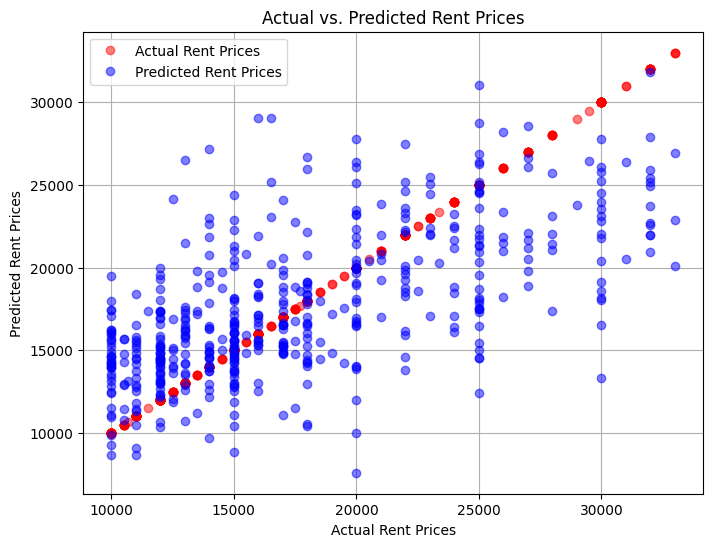

In [486]:
plt.figure(figsize=(8,6))
plt.plot(y_test, y_test, 'o', alpha=0.5, color='red', label='Actual Rent Prices')
plt.plot(y_test, y_preds, 'o', alpha=0.5, color='blue', label='Predicted Rent Prices')

plt.title("Actual vs. Predicted Rent Prices")
plt.xlabel("Actual Rent Prices")
plt.ylabel("Predicted Rent Prices")

plt.legend()
plt.grid(True)
plt.show()